Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tiago Flora"
COLLABORATORS = "Chloe Gabrielle Go"

---

# CS110 Pre-class Work 3.1

## Question 1. 
Paste in your Python implementation of the maximum subarray from the previous class in the cell below and use that to find out the value of the maximum subarray of this array: `A = [-2, -3, 4, -1, -2, 1]`

In [2]:
import math

def bruteforce_max_subarray(A):
    """
    Implements brute-force maximum subarray finding.
    
    Inputs:
    - A: a NON-EMPTY list of floats
    
    Outputs: A tuple of
    - the start index of the max subarray
    - the end index of the max subarray
    - the value of the maximum subarray
    """
    maximum = -float(math.inf)
    right_max = 0
    left_max = 0
    for i in range(len(A)):
        # Every iteration of the loop will restart the sum of the subarray
        subsum = 0
        for j in range(i, len(A)):
            subsum += A[j]
            """
            Instead of changing the maximum subarray inside the if statement,
            we can define it as max(subsum, maximum).
            However, if we do this, we will get an AssertionError for the first test,
            for the algorithm will choose to update the starting index of
            the maximum subarray of the first assert test, which can be either 1 or 3.
            """
#            maximum = max(subsum, maximum)
            if maximum < subsum:
                maximum = subsum
                right_max = j
                left_max = i
    return((left_max, right_max, maximum))

A = [-2,-3,4,-1,-2,1]

bruteforce_max_subarray(A)

(2, 2, 4)

## Question 2. 
Now, your friend Joe comes and appends a single extra number at the end of the array, which becomes:  `B = [-2, -3, 4, -1, -2, 1, 8]`. Do you have to re-run the entire maximum subarray again? Explain your answer. 
The subsequent questions will help you figure out an efficient algorithmic strategy to address the last question, but make sure to write your explanation above first, before answering the remaining questions.


You do not. As you add a value at the end of the array, we could just check its value (positive or negative), and evaluate whether the maximum subarray, then, could be larger than it currently is. If the number is negative, it certainly cannot; but if it is positive, you can check from the starting position of the previous maximum subarray and sum values up to the end. If the resulting subarray yields a larger sum than the previous one, we can return it instead of the previous one.

## Question 3. 

**Determine if the following statement is True or False and explain your answer.**
If the maximum subarray of the array A is different than the maximum subarray of the array B (questions 1 and 2), the new maximum-subarray doesn’t need to include 8 (i.e., the newly appended element). 


For this specific case, the statement is False. The maximum subarray of A and B are only different because B includes 8, and thus B's maximum subarray needs to include it. In a general case, the maximum subarray including 8 or whatever last element appended to the original array is contingent on the inclusion generating a larger sum than previously.

## Question 4.
Complete the Python function `incremental_max_subarray(x, mx)` in the cell below.

This [video](https://www.youtube.com/watch?v=AAgErqQmwmA&list=PLF_a-qBXTGFektoI6JUOTRL36JlvD04BR&index=4&t=0s)  might be helpful to understand the `incremental_max_subarray` problem.

In [3]:
def incremental_max_subarray(x, mx):
    """ 
    Inputs:
    - x: a NON-EMPTY list of numbers (e.g., the array B in the first two questions above). 
        * If x has 1 element: returns the value of the element regardless of the value of mx
    - mx: the maximum subarray of x excluding its last element (i.e., compute the 
    maximum subarray of the input array x considering only its first len(x) - 1 elements)
    
    Output: The maximum subarray of the array x.
    
    For example, using the array B in question 2, the result of incremental_max_subarray(B, 4) 
    is 10 (10 = 8 + 1 - 2 -1 + 4).
    """
    if len(x) == 1:
        return(x[0])
    else:
        new_subsum = 0
        for j in range(len(x)-1, -1, -1):
            new_subsum += x[j]
            if new_subsum > mx:
                mx = new_subsum
        return(mx)

In [4]:
B = [-2, -3, 4, -1, -2, 1, 8]
assert(incremental_max_subarray(B, 4) == 10)
assert(incremental_max_subarray(B[:1], 0) == B[0])

As we can see, the function returns the correct values when an array A has more than one element, and then disregards the second argument mx if len(A) == 1.

In [5]:
def max_subarray(A):
    """
    Using `incremental_max_subarray` iteratively on A to produce the value of the maximum
    subarray of A.
    
    Inputs:
    - A: a NON-EMPTY list of floats
    
    Outputs: float, the sum of the maximum subarray of A
    """
    x_i = A[:1] # Initialize an iteratively updated array
    mx_i = A[0] # Initialize an iteratively updated maximum sum
    for i in range(len(A)+1):
        mx_i = incremental_max_subarray(x_i, mx_i)
        x_i = A[:i+1]
    return(mx_i)

In [6]:
max_subarray(B)

10

In [7]:
C = [-2,5,1,7,1,6,10,-11,3,6,-8]
max_subarray(C)

30

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Part 2.
Is this more efficient than the divide-and-conquer approach? Explain.

We know from Cormen et al that the divide-and-conquer approach to the maximum subarray problem is $\Theta(n\log n)$. Given that our method includes two for loops, one implicit in the call for incremental_max_subarray() and another explicit in max_subarray(), we can expect max_subarray() to be $O(n^2)$. Thus, this algorithm would not be more efficient in terms of step count than the divide-and-conquer approach, as it will take more steps to run, asymptotically.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

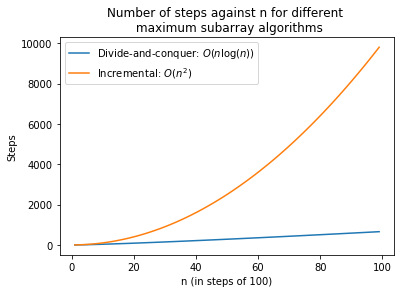

In [10]:
x = np.arange(1, 100, 1)
y = x*np.log2(x)

y1 = x**2

plt.plot(x,y, label = "Divide-and-conquer: $O(n \log(n))$")
plt.plot(x,y1, label = "Incremental: $O(n^2)$")
plt.xlabel('n (in steps of 100)')
plt.ylabel('Steps')
plt.title('Number of steps against n for different \n maximum subarray algorithms')
plt.legend()
plt.show()